# Moscow Car Prices

Импортируем необходимые библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данные

In [4]:
df = pd.read_csv('all_auto_ru_09_09_2020.csv')

Выводим первые 5 строк датасета

In [5]:
df.head()

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,Руль,Состояние,Владельцы,ПТС,Таможня,Владение,price,start_date,hidden,model
0,Седан,AUDI,040001,бензин,1990.0,2.8 MT (174 л.с.) 4WD,4.0,1991,SEDAN MECHANICAL 2.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,200000.0,2019-10-03T08:09:11Z,NaN,100
1,Седан,AUDI,EE1D19,бензин,1982.0,1.8 MT (90 л.с.),4.0,1986,SEDAN MECHANICAL 1.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,60000.0,2020-09-06T06:49:40Z,NaN,100
2,Универсал 5 дв.,AUDI,0000CC,бензин,1988.0,2.3 MT (136 л.с.) 4WD,5.0,1989,WAGON_5_DOORS MECHANICAL 2.3,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,99000.0,2020-09-02T14:04:21Z,NaN,100
3,Седан,AUDI,CACECB,бензин,1988.0,1.8 MT (90 л.с.),4.0,1989,SEDAN MECHANICAL 1.8,MECHANICAL,...,LEFT,NaN,3.0,ORIGINAL,True,NaN,65000.0,2020-08-23T17:40:09Z,NaN,100
4,Седан,AUDI,040001,бензин,1990.0,2.0 MT (101 л.с.),4.0,1991,SEDAN MECHANICAL 2.0,MECHANICAL,...,LEFT,NaN,3.0,DUPLICATE,True,NaN,100000.0,2020-09-08T09:22:07Z,NaN,100


Выводим размер датасета

In [6]:
df.shape

(89378, 26)

Выводим общую информацию по всем столбцам датасета

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89378 entries, 0 to 89377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              89377 non-null  object 
 1   brand                 89378 non-null  object 
 2   color                 89378 non-null  object 
 3   fuelType              89378 non-null  object 
 4   modelDate             89377 non-null  float64
 5   name                  89377 non-null  object 
 6   numberOfDoors         89377 non-null  float64
 7   productionDate        89378 non-null  int64  
 8   vehicleConfiguration  89377 non-null  object 
 9   vehicleTransmission   89377 non-null  object 
 10  engineDisplacement    89377 non-null  object 
 11  enginePower           89377 non-null  float64
 12  description           86124 non-null  object 
 13  mileage               89378 non-null  int64  
 14  Комплектация          89378 non-null  object 
 15  Привод             

Видно, что датасет имеет объекты NaN. Выведем тепловую карту пропусков

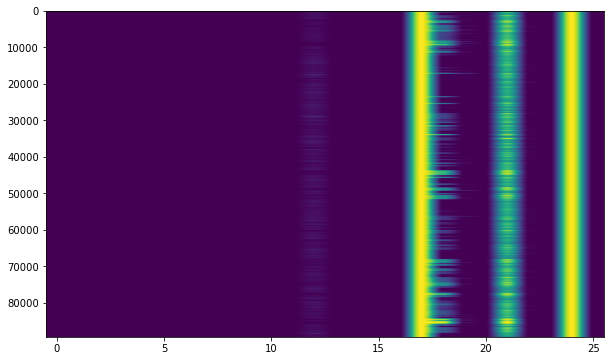

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(df.isna(), cmap='viridis', aspect='auto')

plt.show()

## Проанализируем каждый столбец

### Столбец 'price'

Данный столбец содержит информацию о стоимости автомобилей

In [9]:
df['price']

0         200000.0
1          60000.0
2          99000.0
3          65000.0
4         100000.0
           ...    
89373     450000.0
89374     485000.0
89375    1090000.0
89376    1180000.0
89377    1075000.0
Name: price, Length: 89378, dtype: float64

Посчитаем пропуски

In [10]:
df['price'].isna().sum()

410

Удалим пропуски

In [11]:
df = df.dropna(subset=['price'])
df['price'].isna().sum()

0

Выведем график распределения стоимости автомобилей

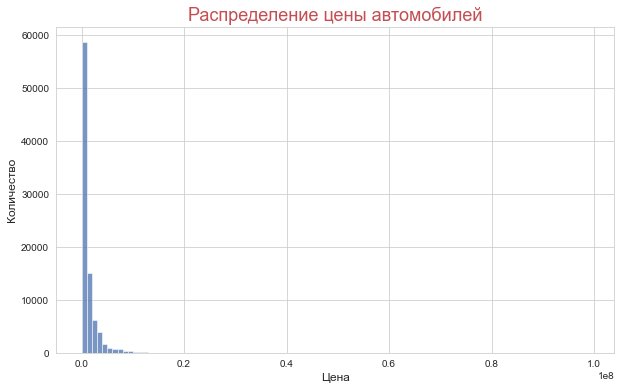

In [12]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['price'], ax=ax, kde=False, color='#4c72b0', binwidth=1000000)
ax.set_xlabel('Цена', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение цены автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Удалим выбросы

In [13]:
mean = np.log(df['price']).mean()
std = np.log(df['price']).std()

# определяем выбросы
lower_bound = np.exp(mean - 3 * std)
upper_bound = np.exp(mean + 3 * std)

print(lower_bound, upper_bound)

30768.58344658046 16875499.371955946


In [14]:
df = df.loc[((df['price'] < upper_bound) & (df['price'] > lower_bound))]

Выведем новый график распределения стоимости автомобилей

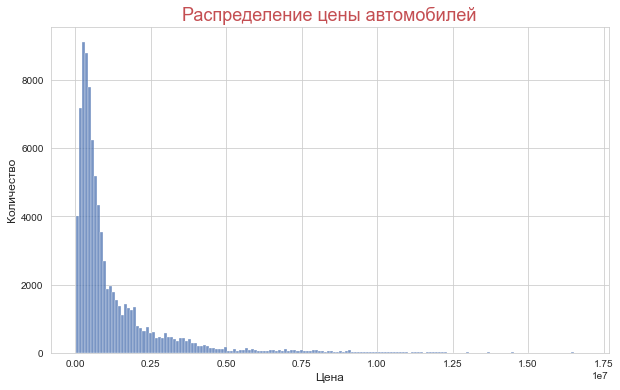

In [15]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['price'], ax=ax, kde=False, color='#4c72b0', binwidth=100000)
ax.set_xlabel('Цена', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение цены автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбцы 'Состояние', 'hidden'

In [16]:
print("Количество NaN элементов в столбце 'hidden':",df['hidden'].isna().sum(), "из 89378")
print("Количество NaN элементов в столбце 'Состояние':",df['Состояние'].isna().sum(), "из 89378")

Количество NaN элементов в столбце 'hidden': 88843 из 89378
Количество NaN элементов в столбце 'Состояние': 88843 из 89378


Так как столбцы 'Состояние' и 'hidden' имеют все пропущенные элементы, то очевидно, что они не несут никакой полезной информации. Удалим эти столбцы.

In [17]:
df = df.drop(columns=['Состояние', 'hidden'])

### Столбец 'bodyType'

Данный столбец содержит информацию о типе кузова автомобилей

In [18]:
df['bodyType']

0                  Седан
1                  Седан
2        Универсал 5 дв.
3                  Седан
4                  Седан
              ...       
89373            Минивэн
89374            Минивэн
89375            Минивэн
89376            Минивэн
89377            Минивэн
Name: bodyType, Length: 88843, dtype: object

Проверим на наличие пропусков

In [19]:
df['bodyType'].isna().sum()

1

Удалим строку с пропуском

In [20]:
df = df.dropna(subset=['bodyType'])

Выведем все уникальные значения этого столбца

In [21]:
df['bodyType'].unique()

array(['Седан', 'Универсал 5 дв.', 'Хэтчбек 5 дв. Sportback',
       'Хэтчбек 3 дв.', 'Хэтчбек 5 дв.', 'Кабриолет', 'Купе',
       'Лифтбек Sportback', 'Лифтбек', 'Седан Long', 'Внедорожник 5 дв.',
       'Кабриолет Roadster', 'Седан 2 дв.', 'Седан Gran Coupe',
       'Компактвэн', 'Компактвэн Gran Tourer', 'Лифтбек Gran Turismo',
       'Хэтчбек 3 дв. Compact', 'Лифтбек Gran Coupe', 'Купе-хардтоп',
       'Родстер Roadster', 'Родстер', 'Внедорожник 5 дв. ESV', 'Минивэн',
       'Пикап Двойная кабина', 'Внедорожник 3 дв.',
       'Пикап Одинарная кабина', 'Тарга', 'Пикап Двойная кабина Crew Cab',
       'Пикап Двойная кабина Double',
       'Пикап Одинарная кабина Regular Cab', 'Внедорожник 5 дв. EXT',
       'Седан SRT8', 'Минивэн SWB', 'Минивэн Grand', 'Компактвэн Grand',
       'Универсал 5 дв. CrossTourer', 'Минивэн Long', 'Минивэн XL',
       'Микровэн Coach', 'Хэтчбек 5 дв. Best', 'Хэтчбек 5 дв. SRT4',
       'Купе SRT', 'Седан SRT', 'Пикап Полуторная кабина',
       'Пикап Двойн

Видно, что большинство видов кузова имеют специфичные названия. Однако стоит отметить, что первое слово каждого из этих значений несет наибольшую информацию. Удалим все слова, кроме первого, чтобы упростить этот столбец. Это поможет нам при обучении

In [22]:
df['bodyType'] = df['bodyType'].str.split().str[0]

Выведем новые уникальные значения

In [23]:
df['bodyType'].unique()

array(['Седан', 'Универсал', 'Хэтчбек', 'Кабриолет', 'Купе', 'Лифтбек',
       'Внедорожник', 'Компактвэн', 'Купе-хардтоп', 'Родстер', 'Минивэн',
       'Пикап', 'Тарга', 'Микровэн', 'Фастбек', 'Седан-хардтоп', 'Фургон',
       'Лимузин'], dtype=object)

Видно, что теперь он содержит более конкретную информацию о кузове автомобиля

### Столбец 'brand'

Данный столбец содержит информацию о марках автомобилей

In [24]:
df['brand']

0              AUDI
1              AUDI
2              AUDI
3              AUDI
4              AUDI
            ...    
89373    SSANG_YONG
89374    SSANG_YONG
89375    SSANG_YONG
89376    SSANG_YONG
89377    SSANG_YONG
Name: brand, Length: 88842, dtype: object

Выведем количество значений NaN

In [25]:
df['brand'].isna().sum() 

0

Выведем количество уникальных значений для этого столбца

In [26]:
df['brand'].nunique()

36

Выведем все уникальные значения этого столбца

In [27]:
df['brand'].unique()

array(['AUDI', 'BMW', 'CADILLAC', 'CHERY', 'CHEVROLET', 'CHRYSLER',
       'CITROEN', 'DAEWOO', 'DODGE', 'FORD', 'GEELY', 'HONDA', 'HYUNDAI',
       'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LEXUS', 'MAZDA', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT',
       'SKODA', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'GREAT_WALL', 'LAND_ROVER', 'MERCEDES', 'SSANG_YONG'], dtype=object)

### Столбец 'color'

Данный столбец содержит информацию о цвете автомобилей

In [28]:
df['color']

0        040001
1        EE1D19
2        0000CC
3        CACECB
4        040001
          ...  
89373    040001
89374    CACECB
89375    040001
89376    97948F
89377    FAFBFB
Name: color, Length: 88842, dtype: object

Выведем количество значений NaN

In [29]:
df['color'].isna().sum()

0

Выведем все уникальные значения этого столбца

In [30]:
df['color'].unique()

array(['040001', 'EE1D19', '0000CC', 'CACECB', '007F00', 'FAFBFB',
       '97948F', '22A0F8', '660099', '200204', 'C49648', 'DEA522',
       '4A2197', 'FFD600', 'FF8649', 'FFC0CB'], dtype=object)

### Столбец 'fuelType'

Данный столбец содержит информацию о типе топлива автомобилей

In [31]:
df['fuelType']

0        бензин
1        бензин
2        бензин
3        бензин
4        бензин
          ...  
89373    дизель
89374    дизель
89375    дизель
89376    дизель
89377    дизель
Name: fuelType, Length: 88842, dtype: object

Выведем количество значений NaN

In [32]:
df['fuelType'].isna().sum()

0

Выведем все уникальные значения этого столбца

In [33]:
df['fuelType'].unique()

array(['бензин', 'дизель', 'электро', 'гибрид', 'газ'], dtype=object)

### Столбец 'modelDate'

Данный столбец содержит информацию о годе каждой модели

In [34]:
df['modelDate']

0        1990.0
1        1982.0
2        1988.0
3        1988.0
4        1990.0
          ...  
89373    2004.0
89374    2004.0
89375    2013.0
89376    2013.0
89377    2013.0
Name: modelDate, Length: 88842, dtype: float64

Выведем количество значений NaN

In [35]:
df['modelDate'].isna().sum()

0

Выведем количество уникальных значений для этого столбца

In [36]:
df['modelDate'].nunique()

78

Построем график распределения даты выпуска автомобилей

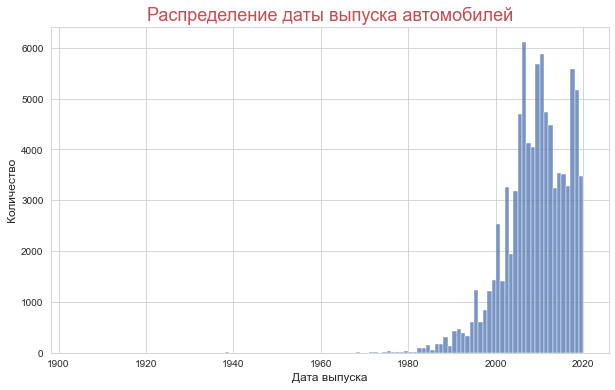

In [37]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['modelDate'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Удалим выбросы из данного столбца

In [38]:
mean = np.log(df['modelDate']).mean()
std = np.log(df['modelDate']).std()

# определяем выбросы
lower_bound = np.exp(mean - 3 * std)
upper_bound = np.exp(mean + 3 * std)

print(lower_bound, upper_bound)

1986.41936860402 2030.8997227729456


Выведем количество строк, которые будем удалять

In [39]:
df.loc[df['modelDate'] > lower_bound].shape[0]

88024

Удалим строки

In [40]:
df = df.loc[df['modelDate'] > lower_bound]

Новое количество строк

In [41]:
df.shape[0]

88024

Построим график распределения дат с новыми данными

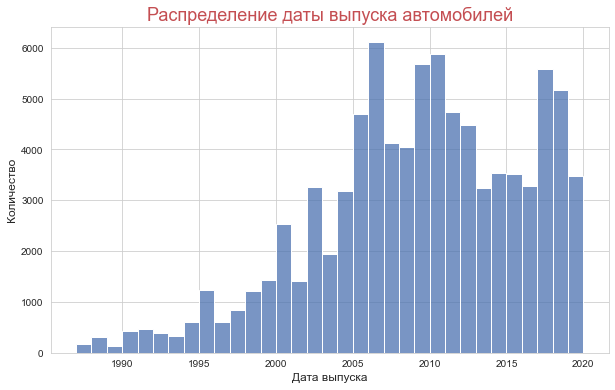

In [42]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['modelDate'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'name'

Данный столбец содержит информацию о названии автомобилей

In [43]:
df['name']

0         2.8 MT (174 л.с.) 4WD
2         2.3 MT (136 л.с.) 4WD
3              1.8 MT (90 л.с.)
4             2.0 MT (101 л.с.)
5             2.8 MT (174 л.с.)
                  ...          
89373    2.7d AT (163 л.с.) 4WD
89374    2.7d AT (163 л.с.) 4WD
89375    2.0d AT (149 л.с.) 4WD
89376    2.0d AT (149 л.с.) 4WD
89377    2.0d AT (149 л.с.) 4WD
Name: name, Length: 88024, dtype: object

Выведем количество значений NaN

In [44]:
df['name'].isna().sum()

0

Выведем количество уникальных значений для этого столбца

In [45]:
df['name'].nunique()

4193

### Столбец 'numberOfDoors'

Данный столбец содержит информацию о количестве дверей автомобилей

In [46]:
df['numberOfDoors']

0        4.0
2        5.0
3        4.0
4        4.0
5        4.0
        ... 
89373    5.0
89374    5.0
89375    5.0
89376    5.0
89377    5.0
Name: numberOfDoors, Length: 88024, dtype: float64

Выведем количество значений NaN

In [47]:
df['numberOfDoors'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [48]:
df['numberOfDoors'].unique()

array([4., 5., 3., 2.])

### Столбец 'productionDate'

Данный столбец содержит информацию о дате выпуска автомобилей

In [49]:
df['productionDate']

0        1991
2        1989
3        1989
4        1991
5        1993
         ... 
89373    2006
89374    2007
89375    2014
89376    2013
89377    2014
Name: productionDate, Length: 88024, dtype: int64

Выведем количество значений NaN

In [50]:
df['productionDate'].isna().sum()

0

Построим график распределения даты выпуска автомобилей

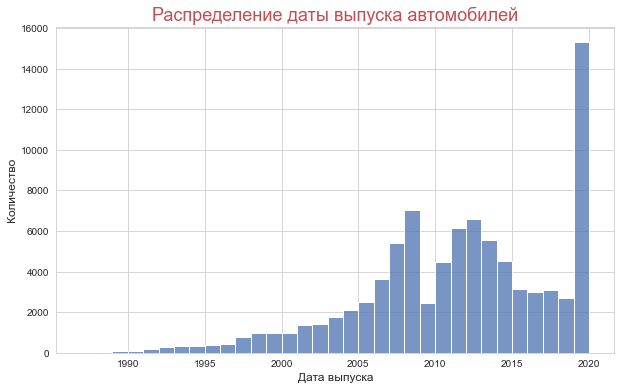

In [51]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['productionDate'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'vehicleTransmission'

Данный столбец содержит информацию о коробке передач автомобилей

In [52]:
df['vehicleTransmission']

0        MECHANICAL
2        MECHANICAL
3        MECHANICAL
4        MECHANICAL
5        MECHANICAL
            ...    
89373     AUTOMATIC
89374     AUTOMATIC
89375     AUTOMATIC
89376     AUTOMATIC
89377     AUTOMATIC
Name: vehicleTransmission, Length: 88024, dtype: object

Выведем количество значения NaN для данного столбца

In [53]:
df['vehicleTransmission'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [54]:
df['vehicleTransmission'].unique()

array(['MECHANICAL', 'AUTOMATIC', 'ROBOT', 'VARIATOR'], dtype=object)

### Столбец 'engineDisplacement'

Данный столбец содержит информацию о вместимости двигателей автомобилей

In [55]:
df['engineDisplacement']

0         2.8
2         2.3
3         1.8
4         2.0
5         2.8
         ... 
89373    2.7d
89374    2.7d
89375    2.0d
89376    2.0d
89377    2.0d
Name: engineDisplacement, Length: 88024, dtype: object

Выведем количество значений NaN

In [56]:
df['engineDisplacement'].isna().sum()

0

Выдедем количество уникальных значений для данного столбца

In [57]:
df['engineDisplacement'].nunique()

515

Выведем все уникальные значения для данного столбца

In [58]:
df['engineDisplacement'].unique()

array(['2.8', '2.3', '1.8', '2.0', '2.6', '2.2', 'S4', '2.5d', '1.9d',
       '1.6', '1.4', '1.2d', 'ultra', '1.2', '3.2', '1.5', '2.0d', '8V',
       '3.1', '2.4', '3.0d', '2.7d', '16V', '3.0', '7S-tronic',
       'tiptronic', '40', '45', '55', '2.7', '4.2', 'S-tronic',
       'Tiptronic', 'Long', '4.0', '60', '3.9d', '6.0', '3.7', '4.1d',
       '35', '8tiptronic', 'clean', '2.0hyb', '3.6', '5.9d', 'V10', 'V8',
       '2.5', '2.9', '5.0', '5.2', 'M135i', '116i', '120i', '118i',
       '135i', 'M140i', '125i', '120d', '130i', '118d', '218i', '220i',
       '220d', 'M235i', '218d', '216d', '335i', '320i', '318i', '318d',
       '320d', '316i', '328i', '330i', '325xi', '325i', '330d', '340i',
       '323i', '335d', '335xi', '330xi', 'N46', '420d', '428i', '420i',
       '435i', '430i', '440i', '520d', '530d', '525i', '523i', '520i',
       '530i', '525d', '528i', '550i', '535d', 'M550i', 'M550d', '540i',
       '535i', '530xi', '530Li', '525xi', '520Li', '528Li', '535xi',
       '545i',

### Столбец 'enginePower'

Данный столбец содержит информацию о мощности автомобилей

In [59]:
df['enginePower']

0        174.0
2        136.0
3         90.0
4        101.0
5        174.0
         ...  
89373    163.0
89374    163.0
89375    149.0
89376    149.0
89377    149.0
Name: enginePower, Length: 88024, dtype: float64

Выведем количество значений NaN

In [60]:
df['enginePower'].isna().sum()

0

Построем график распределения мощности автомобилей

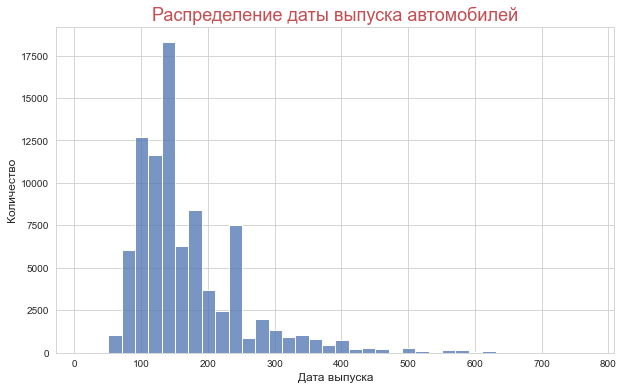

In [61]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['enginePower'], ax=ax, kde=False, color='#4c72b0', binwidth=20)
ax.set_xlabel('Дата выпуска', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты выпуска автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Найдем и удалим выбросы

In [62]:
# вычисляем межквартильный размах
q1 = np.log(df['enginePower']).quantile(0.25)
q3 = np.log(df['enginePower']).quantile(0.75)
iqr = q3 - q1

# определяем выбросы
lower_bound = np.exp(q1 - 1.5 * iqr)
upper_bound = np.exp(q3 + 1.5 * iqr)

print(lower_bound, upper_bound)

50.520191286213304 452.9872001146838


Выведем количество строк с выбросами

In [63]:
df.loc[df['enginePower'] > upper_bound].shape[0]

1161

Удалим выбросы

In [64]:
df = df.loc[df['enginePower'] < upper_bound]

In [65]:
df.shape[0]

86863

Построем новый график распределния мощности

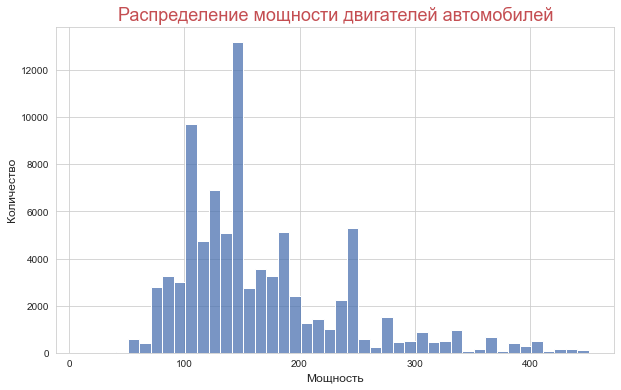

In [66]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['enginePower'], ax=ax, kde=False, color='#4c72b0', binwidth=10)
ax.set_xlabel('Мощность', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение мощности двигателей автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'description'

Данный столбец содержит информацию о описании автомобилей из объявлений

In [67]:
df['description']

0         Машина  в приличном состоянии ,не гнилая не р...
2        ПТС Оригинал!\nПолный комплект ключей!\nПо рез...
3                                                      NaN
4        Машина не гнилая, дыр нет, днище целое, даже в...
5        Хорошая комплектация: климат, эл. стекла, эл. ...
                               ...                        
89373    СВЕТИТ КРУТИТ РАБОТАЕТ ВСЁ.  БЕЗ ТОРГА .В МОСК...
89374    Автомобиль на ходу, каждый день в движении.\nС...
89375    Автомобиль куплен в декабре 2015 г., новым. Вс...
89376    Продаю семейного любимца. Большой вместительны...
89377    Авто в отличном состоянии всё работает. Большо...
Name: description, Length: 86863, dtype: object

Выведем количество значений NaN

In [68]:
df['description'].isna().sum()

3163

Так как зачастую цена автомобиля зависит от полноты его описания, введем новый столбец куда включим количество символов в описании

In [69]:
df['description_len'] = df['description'].str.len()

Пропуски заполним нулем

In [70]:
df['description_len'] = df['description_len'].fillna(0)

Построем график распределения количества символов в описании

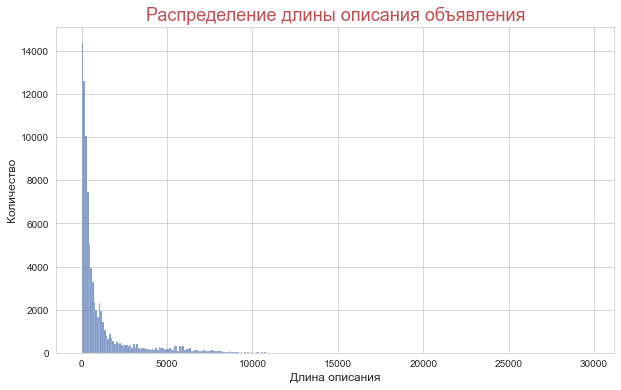

In [71]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['description_len'], ax=ax, kde=False, color='#4c72b0', binwidth=100)
ax.set_xlabel('Длина описания', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение длины описания объявления', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Посчитаем кожффициент корреляции для этого столбца и цены

In [72]:
np.corrcoef(df['description_len'], df['price'])[0, 1]

0.5577343875962468

### Столбец 'mileage'

Данный столбец содержит информацию о пробеге автомобилей

In [73]:
df['mileage']

0        350000
2        230000
3        240000
4        300000
5        200000
          ...  
89373    260000
89374    300000
89375    126000
89376     84000
89377    144000
Name: mileage, Length: 86863, dtype: int64

Выведем количество значений NaN

In [74]:
df['mileage'].isna().sum()

0

Построем график распределения пробега автомобилей

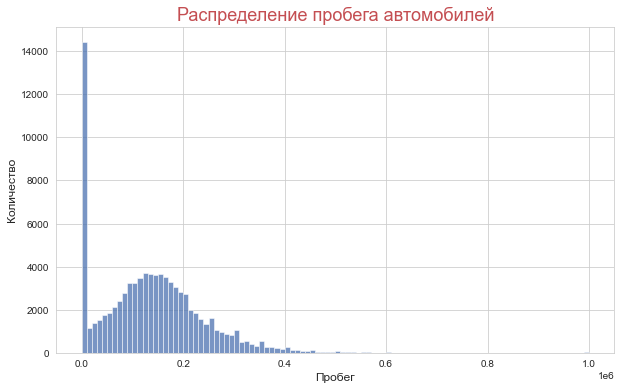

In [75]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['mileage'], ax=ax, kde=False, color='#4c72b0', binwidth=10000)
ax.set_xlabel('Пробег', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение пробега автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

Видно, что большое количество объявлений имеет пробег 0

### Столбец 'Комплектация'

Данный столбец содержит информацию о комплектации автомобилей

In [76]:
df['Комплектация']

0                                              {'id': '0'}
2                                              {'id': '0'}
3                                              {'id': '0'}
4                                              {'id': '0'}
5                                              {'id': '0'}
                               ...                        
89373                                          {'id': '0'}
89374                                          {'id': '0'}
89375    {'id': '10408082', 'name': 'Luxury', 'availabl...
89376    {'id': '10408081', 'name': 'Elegance', 'availa...
89377                                          {'id': '0'}
Name: Комплектация, Length: 86863, dtype: object

Выведем количество значений NaN

In [77]:
df['Комплектация'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [78]:
df['Комплектация'].unique()

array(["{'id': '0'}",
       "{'id': '20717199', 'name': 'Basis', 'available_options': ['sport-seats', 'multi-wheel', 'heated-wash-system', 'airbag-passenger', 'lock', 'door-sill-panel', 'electro-mirrors', 'mirrors-heat', 'start-stop-function', 'computer', 'seat-transformation', 'wheel-power', 'fabric-seats', 'airbag-side', 'abs', 'wheel-leather', 'climate-control-1', 'esp', 'audiopreparation', 'front-centre-armrest', 'electro-window-back', '16-inch-wheels', 'condition', 'airbag-driver', 'isofix', 'electro-window-front', 'light-sensor', 'airbag-curtain', 'leather-gear-stick', 'rain-sensor', 'tyre-pressure', 'audiosystem-cd', 'front-seats-heat', 'wheel-configuration2', 'wheel-configuration1', 'immo', '12v-socket', 'third-rear-headrest'], 'vendor_colors': [{'body_color_id': 20617588, 'mark_color_id': 21386826, 'name_ru': 'Mythos black', 'hex_codes': ['010101'], 'color_type': 'METALLIC', 'stock_color': {'hex_code': '040001', 'name_ru': 'черный'}, 'photos': [{'name': '34-front', 'sizes': {

Интерпретировать данный столбец тяжело из-за большого количества информации в нем. Однако можно предположить, что длина строки может влиять на цену, так как чем выше параметры комплектации, тем дороже автомобиль. Введем новый столбец с длиной словаря каждой строки

In [79]:
df['equipment'] = df['Комплектация'].apply(eval).apply(len)

In [80]:
df['equipment']

0        1
2        1
3        1
4        1
5        1
        ..
89373    1
89374    1
89375    4
89376    4
89377    1
Name: equipment, Length: 86863, dtype: int64

Поситаем коэффициент корреляции нового столбца и цены

In [81]:
np.corrcoef(df['equipment'], df['price'])[0, 1]

0.5022418475888538

### Столбец 'Привод'

Данный столбец содержит информацию о приводе автомобилей

In [82]:
df['Привод']

0          полный
2          полный
3        передний
4        передний
5        передний
           ...   
89373      полный
89374      полный
89375      полный
89376      полный
89377      полный
Name: Привод, Length: 86863, dtype: object

Выведем количество значений NaN

In [83]:
df['Привод'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [84]:
df['Привод'].unique()

array(['полный', 'передний', 'задний'], dtype=object)

### Столбец 'Руль'

Данный столбец содержит информацию о расположении руля автомобилей

In [85]:
df['Руль']

0        LEFT
2        LEFT
3        LEFT
4        LEFT
5        LEFT
         ... 
89373    LEFT
89374    LEFT
89375    LEFT
89376    LEFT
89377    LEFT
Name: Руль, Length: 86863, dtype: object

Выведем количество значений NaN

In [86]:
df['Руль'].isna().sum()

0

Выведем все уникальные значения для данного столбца

In [87]:
df['Руль'].unique()

array(['LEFT', 'RIGHT'], dtype=object)

### Столбец 'Владельцы'

Данный столбец содержит информацию о количесвте владельцев автомобилей

In [88]:
df['Владельцы']

0        3.0
2        3.0
3        3.0
4        3.0
5        3.0
        ... 
89373    3.0
89374    3.0
89375    1.0
89376    3.0
89377    2.0
Name: Владельцы, Length: 86863, dtype: float64

Выведем количество значений NaN

In [89]:
df['Владельцы'].isna().sum()

13325

Видно, что большое количество имеет значения NaN

In [90]:
df[df['Владельцы'].isna()].head()

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,Руль,Владельцы,ПТС,Таможня,Владение,price,start_date,model,description_len,equipment
332,Седан,AUDI,97948F,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1885400.0,2020-08-10T18:16:24Z,A3,2818.0,4
333,Седан,AUDI,CACECB,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1885400.0,2020-08-10T18:16:24Z,A3,2818.0,4
336,Седан,AUDI,0000CC,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1885400.0,2020-08-04T16:44:36Z,A3,2643.0,4
339,Седан,AUDI,0000CC,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,2016000.0,2020-08-01T03:19:03Z,A3,6295.0,4
342,Седан,AUDI,97948F,бензин,2016.0,1.4 AMT (150 л.с.),4.0,2020,SEDAN ROBOT 1.4,ROBOT,...,LEFT,NaN,ORIGINAL,True,NaN,1946000.0,2020-08-01T03:19:03Z,A3,5943.0,4


Выведем количество автомобилей для каждого года выпуска, которые имеют значения NaN

In [91]:
for i in df[df['Владельцы'].isna()]['productionDate'].unique():
    print('Количество автомобилей без указания количества владельцев для автомобилей {} года:'.format(i), df.loc[((df['Владельцы'].isna()) & (df['productionDate'] == i))].shape[0])

Количество автомобилей без указания количества владельцев для автомобилей 2020 года: 12101
Количество автомобилей без указания количества владельцев для автомобилей 2019 года: 1149
Количество автомобилей без указания количества владельцев для автомобилей 2018 года: 74
Количество автомобилей без указания количества владельцев для автомобилей 2017 года: 1


Видно, что такие значения имеют новые автомобили. Учитывая это, мы можеи предположить, что эти автомобили никогда не имели владельцев и заменим пропуски нулями

In [92]:
df['Владельцы'] = df['Владельцы'].fillna(0)

In [93]:
df['Владельцы'].isna().sum()

0

Построем график распределения для количесвта владельцев автомобилей

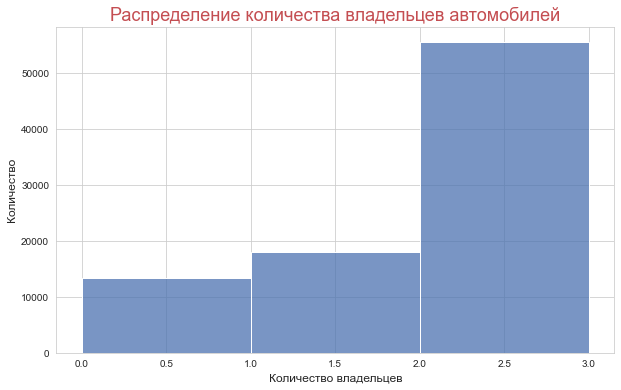

In [94]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['Владельцы'], ax=ax, kde=False, color='#4c72b0', binwidth=1)
ax.set_xlabel('Количество владельцев', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение количества владельцев автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'ПТС'

Данный столбец содержит информацию о ПТС автомобилей

In [95]:
df['ПТС']

0         ORIGINAL
2         ORIGINAL
3         ORIGINAL
4        DUPLICATE
5         ORIGINAL
           ...    
89373     ORIGINAL
89374     ORIGINAL
89375     ORIGINAL
89376     ORIGINAL
89377     ORIGINAL
Name: ПТС, Length: 86863, dtype: object

Выведем количество значений NaN

In [96]:
df['ПТС'].isna().sum()

345

Так как данный столбец имеет маленькое количество пропусков, то мы можем заменить его на моду без вреда для датасета

In [97]:
df['ПТС'] = df['ПТС'].fillna(0)

In [98]:
df['ПТС'].isna().sum()

0

Выведем уникальные значения для данного столбца

In [99]:
df['ПТС'].unique()

array(['ORIGINAL', 'DUPLICATE', 0], dtype=object)

### Столбец 'Таможня'

Данный столбец содержит информацию о растоможенности автомобилей

In [100]:
df['Таможня']

0        True
2        True
3        True
4        True
5        True
         ... 
89373    True
89374    True
89375    True
89376    True
89377    True
Name: Таможня, Length: 86863, dtype: bool

Выведем количество значений NaN

In [101]:
df['Таможня'].isna().sum()

0

Выведем количество уникальных значений для данного столбца

In [102]:
df['Таможня'].nunique()

1

Данный столбец имеет одно уникальное значение и ни одного пропуска. Это означает, что значения столбца одинаковы для всех строк, следовательно, не имеет никакого столбец не имеет никакого смысла. Удалим его

In [103]:
df = df.drop(columns=['Таможня'])

### Столбец 'Владение'

Данный столбец содержит информацию о дате начала владения автомобилей

In [104]:
df['Владение']

0                                NaN
2                                NaN
3                                NaN
4                                NaN
5                                NaN
                    ...             
89373                            NaN
89374     {'year': 2017, 'month': 2}
89375    {'year': 2015, 'month': 12}
89376    {'year': 2017, 'month': 10}
89377     {'year': 2018, 'month': 6}
Name: Владение, Length: 86863, dtype: object

Выведем количество значений NaN

In [105]:
df['Владение'].isna().sum()

58461

### Столбец 'start_date'

Данный столбец содержит информацию о публикации объявления автомобилей

In [106]:
df['start_date']

0        2019-10-03T08:09:11Z
2        2020-09-02T14:04:21Z
3        2020-08-23T17:40:09Z
4        2020-09-08T09:22:07Z
5        2020-09-08T09:47:16Z
                 ...         
89373    2020-02-11T09:29:59Z
89374    2020-05-30T18:56:30Z
89375    2020-08-30T14:39:15Z
89376    2019-05-14T15:43:20Z
89377    2020-08-10T11:30:29Z
Name: start_date, Length: 86863, dtype: object

Выведем количество значений NaN

In [107]:
df['start_date'].isna().sum()

0

Переведем столбец в формат datetime

In [108]:
df['start_date'].str[:10]

0        2019-10-03
2        2020-09-02
3        2020-08-23
4        2020-09-08
5        2020-09-08
            ...    
89373    2020-02-11
89374    2020-05-30
89375    2020-08-30
89376    2019-05-14
89377    2020-08-10
Name: start_date, Length: 86863, dtype: object

In [109]:
df['start_date'] = pd.to_datetime(df['start_date'].str[:10])

In [110]:
df['start_date']

0       2019-10-03
2       2020-09-02
3       2020-08-23
4       2020-09-08
5       2020-09-08
           ...    
89373   2020-02-11
89374   2020-05-30
89375   2020-08-30
89376   2019-05-14
89377   2020-08-10
Name: start_date, Length: 86863, dtype: datetime64[ns]

Построем график распределения даты загрузки объявления

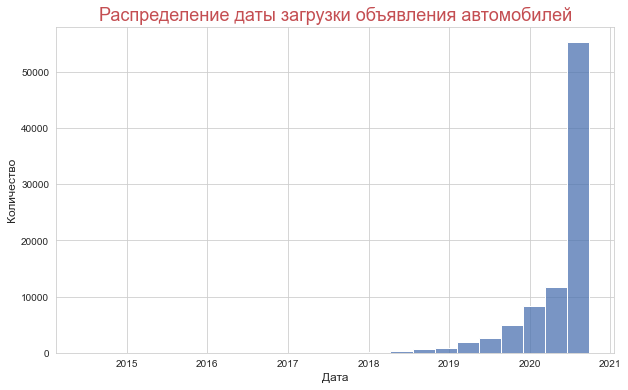

In [111]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=df['start_date'], ax=ax, kde=False, color='#4c72b0', binwidth=100)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Распределение даты загрузки объявления автомобилей', fontsize=18, color='#c44e52')
ax.tick_params(axis='both', labelsize=10)

plt.show()

### Столбец 'model'

Данный столбец содержит информацию о модели автомобилей

In [112]:
df['model']

0           100
2           100
3           100
4           100
5           100
          ...  
89373    RODIUS
89374    RODIUS
89375    STAVIC
89376    STAVIC
89377    STAVIC
Name: model, Length: 86863, dtype: object

Выведем количество значений NaN

In [113]:
df['model'].isna().sum()

0

Выведем количество уникальных значений

In [114]:
df['model'].nunique()

995

# Подготовка данных для построения модели машинного обучения

Выведем общую информацию о столбцах после их обработки

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86863 entries, 0 to 89377
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bodyType              86863 non-null  object        
 1   brand                 86863 non-null  object        
 2   color                 86863 non-null  object        
 3   fuelType              86863 non-null  object        
 4   modelDate             86863 non-null  float64       
 5   name                  86863 non-null  object        
 6   numberOfDoors         86863 non-null  float64       
 7   productionDate        86863 non-null  int64         
 8   vehicleConfiguration  86863 non-null  object        
 9   vehicleTransmission   86863 non-null  object        
 10  engineDisplacement    86863 non-null  object        
 11  enginePower           86863 non-null  float64       
 12  description           83700 non-null  object        
 13  mileage         

Выберем столбцы, которые потребуются для обучения модели

In [116]:
x_columns = ['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'numberOfDoors', 'productionDate', 
             'vehicleTransmission', 'engineDisplacement', 'enginePower', 'mileage', 'Привод', 'Руль', 
             'Владельцы', 'ПТС', 'start_date', 'description_len', 'equipment']

y_columns = ['price']

In [117]:
X = pd.DataFrame()

Проведем нормализацию для числовых столбцов, а для остальных заменим уникальные значения на числа

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x_columns:
    if df[col].dtypes == 'object':
        parental = {element: index for index, element in enumerate(df[col].unique())}
        X[col] = df[col].replace(parental)
    else:
        X[col] = scaler.fit_transform(df.loc[:,[col]])

Выведем новый датафрейм Х, который содержит новые необходимые столбцы

In [119]:
X

,bodyType,brand,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,enginePower,mileage,Привод,Руль,Владельцы,ПТС,start_date,description_len,equipment
0,0,0,0,0,-2.759659,-0.815476,-3.085602,0,0,0.103191,2.115959,0,0,1.007489,0,-1.417405,-0.496405,-0.699421
2,1,0,1,0,-3.053732,0.749102,-3.393621,0,1,-0.427389,0.936142,0,0,1.007489,0,0.685719,0.027254,-0.699421
3,0,0,2,0,-3.053732,-0.815476,-3.393621,0,2,-1.069670,1.034460,1,0,1.007489,0,0.622939,-0.626323,-0.699421
4,0,0,0,0,-2.759659,-0.815476,-3.085602,0,3,-0.916081,1.624369,1,0,1.007489,1,0.723386,-0.510081,-0.699421
5,0,0,3,0,-2.759659,-0.815476,-2.777582,0,0,0.103191,0.641188,1,0,1.007489,0,0.723386,-0.506662,-0.699421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89373,11,35,0,1,-0.701147,0.749102,-0.775458,1,21,-0.050398,1.231096,0,0,1.007489,0,-0.594989,-0.514069,-0.699421
89374,11,35,2,1,-0.701147,0.749102,-0.621448,1,21,-0.050398,1.624369,0,0,1.007489,0,0.089310,-0.328880,-0.699421
89375,11,35,0,1,0.622182,0.749102,0.456619,1,16,-0.245875,-0.086366,0,0,-0.808728,0,0.666885,-0.511790,1.642038
89376,11,35,5,1,0.622182,0.749102,0.302610,1,16,-0.245875,-0.499302,0,0,1.007489,0,-2.308878,0.332104,1.642038


Выведем датафрейм у, который содержит столбец, который будем предсказывать

In [120]:
y = df[y_columns]

In [121]:
y

,price
0,200000.0
2,99000.0
3,65000.0
4,100000.0
5,90000.0
...,...
89373,450000.0
89374,485000.0
89375,1090000.0
89376,1180000.0


Выведем тепловую карту коэффициента корреляции Пирсона

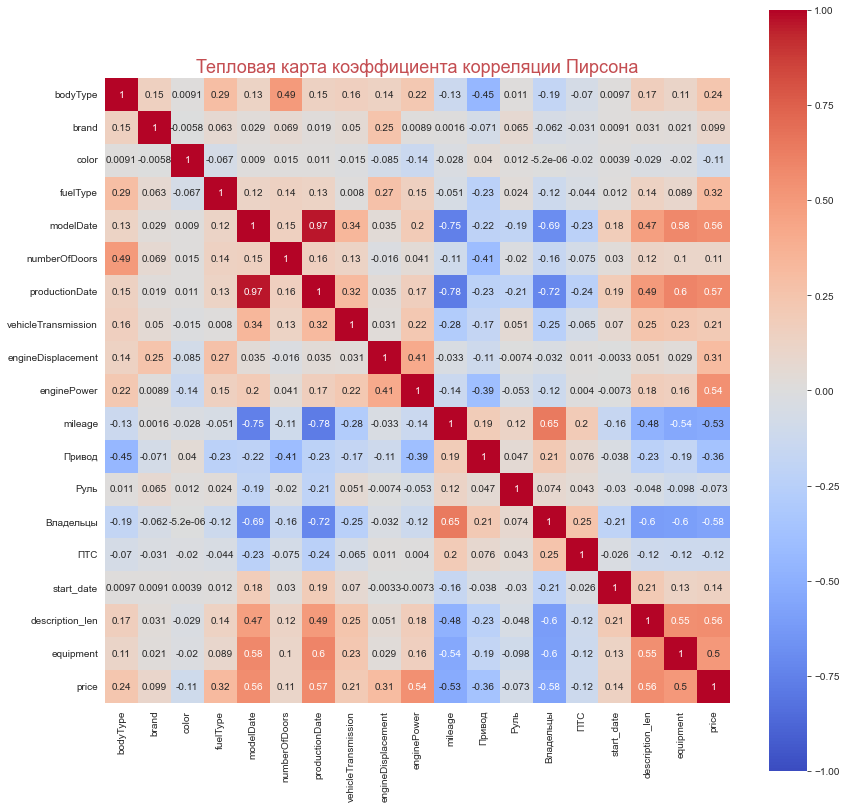

In [122]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14, 14))

corr = pd.concat([X, y], axis=1).corr(method='pearson')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax)
ax.set_title('Тепловая карта коэффициента корреляции Пирсона', fontsize=18, color='#c44e52')

plt.show()

# Построение модели машинного обучения

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
import catboost as cat


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучаем модель на трех моделях и считаем среднее по предсказаниям

In [124]:
xgbr = XGBRegressor(learning_rate = 0.1, 
                    max_depth = 10, 
                    n_estimators = 3000)

xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

In [125]:
mse = mean_squared_error(y_test, y_pred_xgbr)
mae = mean_absolute_error(y_test, y_pred_xgbr)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 57805901698.90
MAE: 97958.61


In [133]:
cbr = CatBoostRegressor(iterations=3000, learning_rate=0.1, depth=10)

cbr.fit(X_train, y_train, silent=True)

y_pred_cbr = cbr.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, y_pred_cbr)
mae = mean_absolute_error(y_test, y_pred_cbr)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 55619313062.64
MAE: 100107.66


In [135]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression',
                     learning_rate=0.1, 
                     max_depth=10,
                     n_estimators=3000)

lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

In [136]:
mse = mean_squared_error(y_test, y_pred_lgbm)
mae = mean_absolute_error(y_test, y_pred_lgbm)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 57559085778.22
MAE: 103741.71


Считаем среднее трех моделей

In [137]:
y_pred_mean = (y_pred_xgbr + y_pred_cbr + y_pred_lgbm) / 3

In [138]:
mse = mean_squared_error(y_test, y_pred_mean)
mae = mean_absolute_error(y_test, y_pred_mean)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 51651627421.99
MAE: 95920.41
